In the paper "Using Data Mining to Predict Secondary School Student Performance" by P. Cortez and A. Silva, the authors considered the problem of predicting student performance in high school using social factors. The following is an extension to their work/analysis, focusing on predicting final math grades.

Using the following methods to identify the coefficients of a linear model relating the final math
grade (column “G3”) to social attributes (remaining columns, excluding “G1”
and ”G2”): 
1. ordinary least squares (OLS)
2. ridge regression (RR)
3. lasso regression
4. exterior derivative estimation (EDE) estimator

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("~/Downloads/student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data.shape

(395, 33)

In [31]:
data.dtypes.head()

school     object
sex        object
age         int64
address    object
famsize    object
dtype: object

In [5]:
Y = data.G3
x = data.loc[:, 'school':'absences']
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [6]:
X = pd.get_dummies(data=x)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [32]:
X.dtypes.head()

age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
dtype: object

# Ordinary Least Squares

In [8]:
ols = LinearRegression(fit_intercept=True)
ols.fit(X, Y)
#np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(Y)
beta_vals = np.hstack([ols.intercept_,ols.coef_])
labels = np.hstack(["Intercept",X.columns])
coefficients_of_features = pd.DataFrame(beta_vals,labels, columns=['Coefficients and Intercept from OLS'])
coefficients_of_features

,Coefficients and Intercept from OLS
Intercept,7.061529e+12
age,-3.725512e-01
Medu,4.572366e-01
Fedu,-1.041584e-01
traveltime,-2.399191e-01
studytime,5.480949e-01
failures,-1.724203e+00
famrel,2.317903e-01
freetime,3.023486e-01
goout,-5.940363e-01


# Ridge Regression

In [9]:
from sklearn.model_selection import cross_val_score

tuning_params=np.arange(0, 100, 1)

val_errors = []
for i in tuning_params:
    RR = Ridge(alpha=i, fit_intercept=True, random_state=123)
    val_error = np.sum(-cross_val_score(RR, 
                                     X, 
                                     y=Y, 
                                     scoring='neg_mean_squared_error', 
                                     cv=10, 
                                     n_jobs=-1))
    val_errors.append(np.sqrt(val_error))

In [10]:
print(val_errors)

[14.332409863871797, 14.073509106060811, 14.037666415402484, 14.006799046871043, 13.979895796726113, 13.956207960277547, 13.935168775332249, 13.916340871737727, 13.899380992373967, 13.88401570331378, 13.870024291655188, 13.857226481503119, 13.845473451542054, 13.83464116021447, 13.824625312893202, 13.815337516565945, 13.806702306159128, 13.798654819375962, 13.79113896007713, 13.784105933930386, 13.777513070742636, 13.771322869735528, 13.765502219778453, 13.76002175808643, 13.754855339368756, 13.74997959373345, 13.745373556407449, 13.741018355943234, 13.736896950347274, 13.732993902699858, 13.729295189495568, 13.72578803623356, 13.722460775811669, 13.719302726091698, 13.716304083652355, 13.713455831267458, 13.710749657067748, 13.70817788368582, 13.705733405962027, 13.70340963601707, 13.701200454684537, 13.69910016845155, 13.697103471184318, 13.695205410022389, 13.693401354914931, 13.691686971347501, 13.690058195870968, 13.68851121409768, 13.68704244087522, 13.685648502386588, 13.6843262

# Tuning-Parameter vs CV Error Plot - RR

Text(0, 0.5, 'Validation Error')

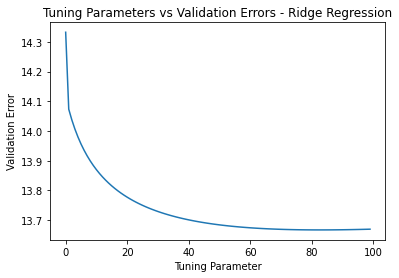

In [11]:
plt.plot(tuning_params, val_errors)
plt.title('Tuning Parameters vs Validation Errors - Ridge Regression')
plt.xlabel('Tuning Parameter')
plt.ylabel('Validation Error')

In [12]:
tuning_params[np.argmin(val_errors)]

83

In [14]:
RR = Ridge(alpha=tuning_params[np.argmin(val_errors)], fit_intercept=True, random_state=123)
RR.fit(X, Y)

Ridge(alpha=83, random_state=123)

# Coefficients - RR

In [15]:
beta_vals_ridge = np.hstack([RR.intercept_,RR.coef_])
labels = np.hstack(["Intercept",X.columns])
coefficients_of_features_RR = pd.DataFrame(beta_vals_ridge,labels, columns=['Coefficients and Intercept from Ridge Regression'])
coefficients_of_features_RR

,Coefficients and Intercept from Ridge Regression
Intercept,14.478495
age,-0.311806
Medu,0.395002
Fedu,0.070053
traveltime,-0.213523
studytime,0.374150
failures,-1.238859
famrel,0.188527
freetime,0.211974
goout,-0.471993


# Lasso Regression

In [16]:
from sklearn.model_selection import cross_val_score

tuning_params=np.arange(0, 1.01, 0.01)

val_errors = []
for i in tuning_params:
    lasso = Lasso(alpha=i, fit_intercept=True, random_state=123)
    val_error = np.sum(-cross_val_score(lasso, 
                                     X, 
                                     y=Y, 
                                     scoring='neg_mean_squared_error', 
                                     cv=10, 
                                     n_jobs=-1))
    val_errors.append(np.sqrt(val_error))

In [17]:
print(val_errors)

[14.11572843628962, 13.994863112378122, 13.89985588539051, 13.852729237587795, 13.816378973225717, 13.787443016502243, 13.769433629354188, 13.755085004994857, 13.749998685541755, 13.759476017440372, 13.773151900628172, 13.785204262629737, 13.786204211553109, 13.779465516545683, 13.771694217422205, 13.768118727527051, 13.765399850942607, 13.767760716218232, 13.77012473363633, 13.76946013048159, 13.76963743305304, 13.77054901729684, 13.770855231181379, 13.77010473775693, 13.770094366017743, 13.76970048096306, 13.769271021978506, 13.770488340307898, 13.772244702827484, 13.775580402627075, 13.780085943803519, 13.785381871473973, 13.792059456402356, 13.800076712493468, 13.809053087183797, 13.818387051616876, 13.828037724941003, 13.837985068524526, 13.8473247689811, 13.855233277037211, 13.862528274396821, 13.870124346217125, 13.878184182682563, 13.886471367891998, 13.894985501350906, 13.903726178866712, 13.91269296206749, 13.921885412810598, 13.931303084381677, 13.940894242831684, 13.9505151

# Tuning-Parameter vs CV Error Plot - Lasso

Text(0, 0.5, 'Validation Error')

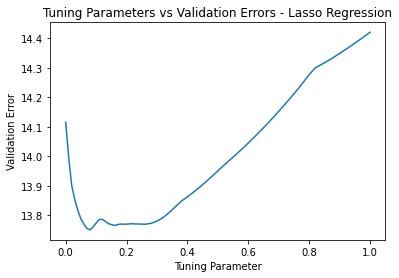

In [18]:
plt.plot(tuning_params, val_errors)
plt.title('Tuning Parameters vs Validation Errors - Lasso Regression')
plt.xlabel('Tuning Parameter')
plt.ylabel('Validation Error')

In [19]:
tuning_params[np.argmin(val_errors)]

0.08

In [20]:
lasso = Lasso(alpha=tuning_params[np.argmin(val_errors)], fit_intercept=True, random_state=123)
lasso.fit(X, Y)

Lasso(alpha=0.08, random_state=123)

# Coefficients - Lasso

In [21]:
beta_vals_lasso = np.hstack([lasso.intercept_,lasso.coef_])
labels = np.hstack(["Intercept",X.columns])
coefficients_of_features_lasso = pd.DataFrame(beta_vals_lasso,labels, columns=['Coefficients and Intercept from Lasso Regression'])
coefficients_of_features_lasso

,Coefficients and Intercept from Lasso Regression
Intercept,1.339857e+01
age,-2.346983e-01
Medu,4.207800e-01
Fedu,0.000000e+00
traveltime,-1.746928e-01
studytime,3.076347e-01
failures,-1.730554e+00
famrel,1.011018e-01
freetime,1.781042e-01
goout,-4.353395e-01


# Exterior Derivative Estimation Estimator

In [22]:
#function for ede

def ede(X,Y,d,mu):    
    u, s, vt = np.linalg.svd(X, full_matrices=True)
    #mu: tuning parameter
    #d: split matrix by tuning d; V1 is pxd and V2 is px(p-d)
    V2 = vt[:,d:56]
    PI = np.dot(V2 , V2.T)
    ones = np.ones((len(X.index),1))
    zeros= np.zeros(((len(X.columns),1)))
    A = mu * PI
    #left stack
    left = np.vstack([ones, zeros])
    #right stack
    right = np.vstack([X, A])
    matrix = np.hstack([left,right])
    Y_array = np.array([Y])
    Y_array_transpose = Y_array.T
    Y1 = np.vstack([Y_array_transpose,zeros])
    mod = LinearRegression(fit_intercept=False)
    mod.fit(matrix, Y1)
    return mod.coef_
    #return np.linalg.inv(np.transpose(matrix).dot(matrix)).dot(np.transpose(matrix)).dot(Y1)

In [23]:
#function for ede cross-validation

def kfold_cv_ede(X,Y,d,mu):
    kfold = KFold(n_splits = 5, shuffle=True, random_state = 123)
    mse = []
    for train_ind, test_ind in kfold.split(X,Y):
        train_x, test_x, train_y, test_y = X.iloc[train_ind,:],X.iloc[test_ind,:],Y.iloc[train_ind],Y.iloc[test_ind]
        beta = ede(train_x, train_y, d, mu)
        mse.append(mean_squared_error(test_y, np.concatenate((np.ones((len(test_x),1)),test_x),axis=1).dot(beta.T)))
    return(np.mean(mse))

In [24]:
#table of d's, mu's, and cv errors
d= np.arange(0,55,1)  
mu = np.arange(0.1,50,3)
mse_vals = []
for i in d:
    for j in mu:
        mse_vals.append([i, j,kfold_cv_ede(X,Y,i,j)])
cv_errors = pd.DataFrame(data=mse_vals, columns=["D", "MU", "CV_ERROR_MSE"])
cv_errors

,D,MU,CV_ERROR_MSE
0,0,0.1,19.122919
1,0,3.1,18.552050
2,0,6.1,17.999464
3,0,9.1,17.813927
4,0,12.1,17.876600
...,...,...,...
930,54,36.1,19.123854
931,54,39.1,19.123854
932,54,42.1,19.123854
933,54,45.1,19.123854


# Tuning-Parameters vs CV Error Plot - EDE

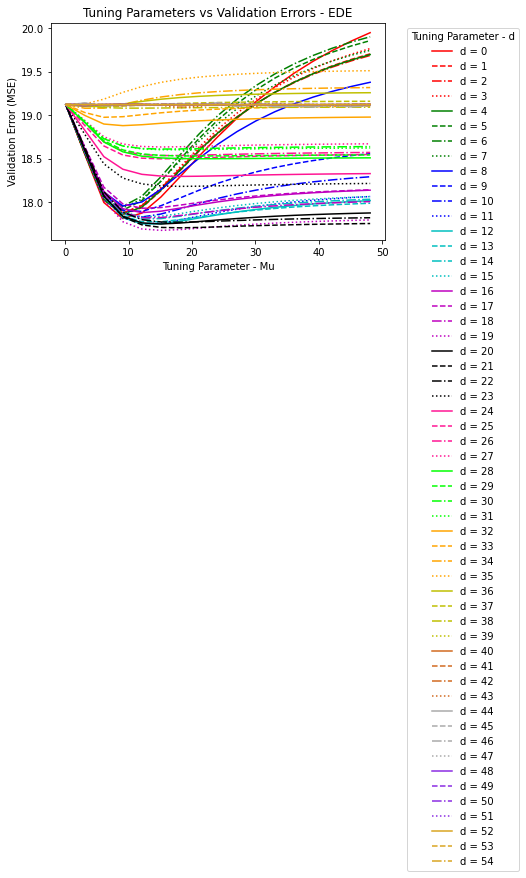

In [26]:
colors = ['r','r','r','r','g','g','g','g','b','b','b','b','c','c','c','c',
          'm','m','m','m','k','k','k','k','deeppink','deeppink','deeppink','deeppink',
          'lime','lime','lime','lime','orange','orange','orange','orange','y','y','y','y',
          'chocolate' ,'chocolate' ,'chocolate' ,'chocolate' ,'darkgray','darkgray','darkgray','darkgray',
          'blueviolet','blueviolet','blueviolet','blueviolet','goldenrod','goldenrod','goldenrod','goldenrod']
linestyles = ['-', '--', '-.',':','-', '--', '-.',':','-', '--', '-.',':','-', '--', '-.',':',
             '-', '--', '-.',':','-', '--', '-.',':','-', '--', '-.',':','-', '--', '-.',':',
             '-', '--', '-.',':','-', '--', '-.',':','-', '--', '-.',':','-', '--', '-.',':',
             '-', '--', '-.',':','-', '--', '-.',':']
xdata = mu
for i in d:
    ydata = cv_errors.CV_ERROR_MSE[cv_errors.D == i]
    plt.plot(xdata, ydata,color = colors[i],linestyle = linestyles[i],label = 'd = %s' %i)
    
plt.legend(title = 'Tuning Parameter - d', bbox_to_anchor=(1.05, 1),loc = 'upper left')
plt.title('Tuning Parameters vs Validation Errors - EDE')
plt.xlabel('Tuning Parameter - Mu')
plt.ylabel('Validation Error (MSE)')
plt.show()
pd.options.mode.chained_assignment = None 

In [27]:
print(cv_errors[cv_errors.CV_ERROR_MSE == cv_errors.CV_ERROR_MSE.min()])

      D    MU  CV_ERROR_MSE
328  19  15.1     17.678595


In [29]:
betas_RR = ede(X,Y,19,15.1)

# Coefficients - EDE

In [30]:
beta_vals_EDE = betas_RR.T
labels = np.hstack(["Intercept",X.columns])
coefficients_of_features_EDE = pd.DataFrame(beta_vals_EDE,labels, columns=['Coefficients and Intercept from EDE'])
coefficients_of_features_EDE

,Coefficients and Intercept from EDE
Intercept,15.171552
age,-0.317948
Medu,0.378889
Fedu,-0.097746
traveltime,-0.314384
studytime,0.444834
failures,-1.822620
famrel,0.333966
freetime,0.164822
goout,-0.595778
